In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [5]:
f = open('customer_service_reps','rb')
info = pickle.load(f)
print(info)

         customer_service_rep_id     subid  current_sub_TF cancel_date  \
4                       36189811  25108574           False         NaT   
5                       36189811  25108574           False         NaT   
6                       36189811  25108574           False         NaT   
7                       36189811  25108574           False         NaT   
8                       31174901  25914865            True         NaT   
...                          ...       ...             ...         ...   
2248409                 30859916  26845271           False         NaT   
2248410                 30859916  26845271           False         NaT   
2248411                 30859916  26845271           False         NaT   
2248412                 30859916  26845271           False         NaT   
2248413                 30859916  26845271           False         NaT   

        account_creation_date  num_trial_days  trial_completed_TF  \
4         2019-11-26 03:30:29             

In [6]:
f = open('subscribers','rb')
subs = pickle.load(f)

In [7]:
subs

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


## 1. Data Cleaning

In [8]:
#Genre: fill na with unknown
subs['preferred_genre'].isna().sum()
subs['preferred_genre'].fillna(value='unknown',inplace=True)

In [9]:
#drop: male & female
subs.dropna(axis=0,subset=['male_TF'],inplace=True)
subs['male_TF'].isna().sum() 

0

In [10]:
#number of services: fill with 1 --> at least one service is used
subs['num_weekly_services_utilized'].fillna(value=1,inplace=True)
subs['num_weekly_services_utilized'].isna().sum() 

0

In [11]:
#weekly watched hours: ffill
subs['weekly_consumption_hour'].fillna(method='ffill',inplace=True)
subs.dropna(axis=0,subset=['weekly_consumption_hour'],inplace=True)
subs['weekly_consumption_hour'].isna().sum()

0

In [12]:
#age: delete outliers, ffill
subs.drop(subs[subs['age']<1].index,inplace=True)
subs.drop(subs[subs['age']>100].index,inplace=True)
subs['age'].fillna(method='ffill',inplace=True)
subs['age'].isna().sum()

0

In [13]:
#drop(3549rows)
subs.dropna(axis=0,subset=['intended_use'],inplace=True)
subs['intended_use'].isna().sum() 

0

In [14]:
#Package type: fill na with unknown(35574)
subs['package_type'].fillna(value='unknown',inplace=True)
subs['package_type'].isna().sum() 

0

In [15]:
subs['retarget_TF'].isna().sum()  #回归玩家

0

In [16]:
#decide not to use that feature because too many NA values
subs['num_ideal_streaming_services'].isna().sum()

109025

In [17]:
#Standardize
max_hour = subs['weekly_consumption_hour'].max()
min_hour = subs['weekly_consumption_hour'].min()
subs['weekly_consumption_hour'] = (subs['weekly_consumption_hour']-min_hour) / (max_hour - min_hour)

In [18]:
max_service = subs['num_weekly_services_utilized'].max()
min_service = subs['num_weekly_services_utilized'].min()
subs['num_weekly_services_utilized'] = (subs['num_weekly_services_utilized']-min_service) / (max_service - min_service)

In [19]:
max_age = subs['age'].max()
min_age = subs['age'].min()
subs['age'] = (subs['age']-min_age) / (max_age - min_age)

## 2. Segmentation

In [ ]:
#featrues to be used:
#Demographic: Age, Sexuality
#Acitivity: weekly services utilized, pkg type
#Personality: genre, intend use

In [20]:
subs_seg = subs[['package_type', 'num_weekly_services_utilized', 'preferred_genre','intended_use','weekly_consumption_hour','age','male_TF']].copy()

In [21]:
subs_seg.head()

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF
380374,base,0.066564,comedy,access to exclusive content,0.506667,0.666667,False
496617,enhanced,0.231959,regional,replace OTT,0.626667,0.166667,True
356799,base,0.066564,drama,replace OTT,0.480000,0.222222,False
681701,base,0.257732,comedy,replace OTT,0.506667,0.200000,False
284782,base,0.066564,comedy,access to exclusive content,0.480000,0.666667,False


In [22]:
subs_seg['male_TF'] = subs_seg['male_TF'].astype('uint8')

In [23]:
subs_seg.head()

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF
380374,base,0.066564,comedy,access to exclusive content,0.506667,0.666667,0
496617,enhanced,0.231959,regional,replace OTT,0.626667,0.166667,1
356799,base,0.066564,drama,replace OTT,0.480000,0.222222,0
681701,base,0.257732,comedy,replace OTT,0.506667,0.200000,0
284782,base,0.066564,comedy,access to exclusive content,0.480000,0.666667,0


In [24]:
#dummy:
seg_dummy = subs_seg.join(pd.get_dummies(subs_seg[['package_type','preferred_genre','intended_use']]))
seg_dummy.drop('package_type',
  axis='columns', inplace=True) 
seg_dummy.drop('preferred_genre',
  axis='columns', inplace=True) 
seg_dummy.drop('intended_use',
  axis='columns', inplace=True) 

In [25]:
seg_dummy

,num_weekly_services_utilized,weekly_consumption_hour,age,male_TF,package_type_base,package_type_economy,package_type_enhanced,package_type_unknown,preferred_genre_comedy,preferred_genre_drama,...,preferred_genre_other,preferred_genre_regional,preferred_genre_unknown,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT
380374,0.066564,0.506667,0.666667,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
496617,0.231959,0.626667,0.166667,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
356799,0.066564,0.480000,0.222222,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
681701,0.257732,0.506667,0.200000,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
284782,0.066564,0.480000,0.666667,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,0.178144,0.560000,0.311111,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
229587,0.161856,0.546667,0.433333,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
281340,0.066564,0.586667,0.388889,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
87198,0.066564,0.586667,0.388889,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans

In [27]:
#define function to find the best k number        
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,10)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
        #inertia_ reports the within group sum of squared errors, which is W in this Jupyter.
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

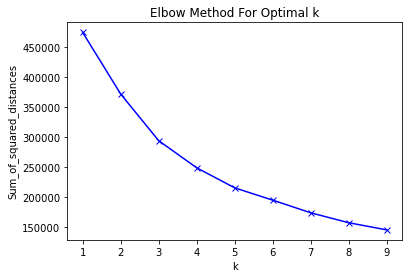

In [28]:
fitting(seg_dummy)

In [31]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(seg_dummy)
kmeans.labels_

array([0, 3, 1, ..., 0, 0, 1], dtype=int32)

In [33]:
np.round(kmeans.cluster_centers_,decimals=2)

array([[ 0.13,  0.55,  0.42,  0.12,  0.86,  0.14,  0.  ,  0.  ,  0.63,
         0.28,  0.04,  0.02,  0.03,  0.  ,  1.  , -0.  ,  0.  , -0.  ,
         0.  , -0.  , -0.  ],
       [ 0.14,  0.55,  0.41,  0.11,  0.87,  0.13,  0.  ,  0.  ,  0.62,
         0.27,  0.04,  0.02,  0.05,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,
         0.06,  0.66,  0.27],
       [ 0.16,  0.55,  0.41,  0.09,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
        -0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.15,  0.39,  0.42,
         0.04,  0.  , -0.  ],
       [ 0.14,  0.56,  0.37,  0.13,  0.  , -0.  ,  1.  ,  0.  ,  0.71,
         0.18,  0.03,  0.02,  0.06,  0.  ,  0.39,  0.  ,  0.  ,  0.  ,
         0.03,  0.43,  0.15]])

In [34]:
cat_idx=[0,2,3,6]
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=20)
kproto.fit(subs_seg, categorical=cat_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 48080, ncost: 26909.320457700156
Run: 1, iteration: 2/20, moves: 11126, ncost: 26835.31735795809
Run: 1, iteration: 3/20, moves: 6498, ncost: 26811.168146995424
Run: 1, iteration: 4/20, moves: 664, ncost: 26811.05283825108
Run: 1, iteration: 5/20, moves: 51, ncost: 26811.051948102584
Run: 1, iteration: 6/20, moves: 6, ncost: 26811.051910548147
Run: 1, iteration: 7/20, moves: 1, ncost: 26811.051910493174
Run: 1, iteration: 8/20, moves: 0, ncost: 26811.051910493174
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 13989, ncost: 27862.88234562003
Run: 2, iteration: 2/20, moves: 2180, ncost: 27861.835318304922
Run: 2, iteration: 3/20, moves: 320, ncost: 27861.806206961584
Run: 2, iteration: 4/20, moves: 50, ncost: 27861.805620665236
Run: 2, iteration: 5/20, moves: 8, ncost: 27861.80561025011
Run: 2, iteration: 6/20, mo

KPrototypes(gamma=0.10021673663471954, max_iter=20, n_clusters=4, verbose=2)

In [35]:
print(kproto.cluster_centroids_[:])

[['0.13037909149351548' '0.5518645764359161' '0.3682481813131657' 'base'
  'comedy' 'access to exclusive content' '0']
 ['0.13845133774280924' '0.5542108142463257' '0.48263660216282245' 'base'
  'drama' 'replace OTT' '0']
 ['0.15714108370274626' '0.5507720617973255' '0.40638565342821964'
  'unknown' 'unknown' 'expand regional access' '0']
 ['0.13829289577384093' '0.5550045854789085' '0.37548657390386236'
  'enhanced' 'comedy' 'access to exclusive content' '0']]


In [ ]:
#check age for each group using formula
subs['age'] = (subs['age']-min_age) / (max_age - min_age)
#Group 1: 0.368
#43.12
#Group 2: 0.483
#53.47
#Group 3: 0.406
#46.54
#Group 4: 0.375
#43.75

In [42]:
min_hour

-32.146759596729076

In [43]:
max_hour

76.59996225386405

In [36]:
min_age

10.0

In [37]:
max_age

100.0

In [38]:
cat_idx=[0,2,3,6]
kproto = KPrototypes(n_clusters=5, verbose=2, max_iter=20)
kproto.fit(subs_seg, categorical=cat_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 36474, ncost: 24457.46683461435
Run: 1, iteration: 2/20, moves: 4062, ncost: 24454.420913649363
Run: 1, iteration: 3/20, moves: 1804, ncost: 24453.754765435886
Run: 1, iteration: 4/20, moves: 788, ncost: 24453.60039321963
Run: 1, iteration: 5/20, moves: 302, ncost: 24453.577612355482
Run: 1, iteration: 6/20, moves: 114, ncost: 24453.573890694563
Run: 1, iteration: 7/20, moves: 22, ncost: 24453.57380169053
Run: 1, iteration: 8/20, moves: 4, ncost: 24453.57379251183
Run: 1, iteration: 9/20, moves: 1, ncost: 24453.57379231406
Run: 1, iteration: 10/20, moves: 0, ncost: 24453.57379231406
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 20733, ncost: 26730.83532401969
Run: 2, iteration: 2/20, moves: 8482, ncost: 26713.317331481056
Run: 2, iteration: 3/20, moves: 1062, ncost: 26713.06180514482
Run: 2, iteration: 4/20, mo

KPrototypes(gamma=0.10021673663471954, max_iter=20, n_clusters=5, verbose=2)

In [39]:
print(kproto.cluster_centroids_[:])

[['0.13243513670749' '0.5526204426029143' '0.43863768294106054' 'base'
  'comedy' 'access to exclusive content' '0']
 ['0.1415629820282495' '0.5563079445993316' '0.4815789228672563'
  'enhanced' 'drama' 'replace OTT' '0']
 ['0.15694714049145553' '0.5507560419516933' '0.4063501714208519'
  'unknown' 'unknown' 'expand regional access' '0']
 ['0.13737302806569832' '0.5543604762451882' '0.27175931243059054'
  'enhanced' 'comedy' 'supplement OTT' '0']
 ['0.1335737202235388' '0.5523969602658618' '0.37557114754162535' 'base'
  'comedy' 'replace OTT' '0']]


In [ ]:
#younger group
#housewife group: love dramma, oldest
#经济适用型group

In [40]:
cat_idx=[0,2,3]
kproto = KPrototypes(n_clusters=5, verbose=2, max_iter=20)
kproto.fit(subs_seg, categorical=cat_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 76704, ncost: 36891.30657081679
Run: 1, iteration: 2/20, moves: 10291, ncost: 36876.75531816557
Run: 1, iteration: 3/20, moves: 3814, ncost: 36873.85414493319
Run: 1, iteration: 4/20, moves: 1321, ncost: 36872.728658052416
Run: 1, iteration: 5/20, moves: 994, ncost: 36872.12632440557
Run: 1, iteration: 6/20, moves: 692, ncost: 36872.039058202536
Run: 1, iteration: 7/20, moves: 421, ncost: 36872.01107369318
Run: 1, iteration: 8/20, moves: 95, ncost: 36872.00887931196
Run: 1, iteration: 9/20, moves: 19, ncost: 36872.00875356187
Run: 1, iteration: 10/20, moves: 8, ncost: 36872.00873134944
Run: 1, iteration: 11/20, moves: 0, ncost: 36872.00873134944
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 60031, ncost: 34224.48250189661
Run: 2, iteration: 2/20, moves: 24042, ncost: 32470.121077001342
Run: 2, iteration: 3/20, 

Run: 10, iteration: 3/20, moves: 388, ncost: 39850.02943303457
Run: 10, iteration: 4/20, moves: 62, ncost: 39850.02849780698
Run: 10, iteration: 5/20, moves: 22, ncost: 39850.028399902476
Run: 10, iteration: 6/20, moves: 5, ncost: 39850.02839059472
Run: 10, iteration: 7/20, moves: 0, ncost: 39850.02839059472
Best run was number 7


KPrototypes(gamma=0.1297563877990565, max_iter=20, n_clusters=5, verbose=2)

In [41]:
print(kproto.cluster_centroids_[:])

[['0.1314093545359624' '0.5458328718410722' '0.3585988386227978' '0.0'
  'base' 'comedy' 'access to exclusive content']
 ['0.15588664399843266' '0.5438238264904456' '0.4068691981248993' '0.0'
  'unknown' 'unknown' 'expand regional access']
 ['0.1616428343731167' '0.6159877378054178' '0.408122845206963' '1.0'
  'base' 'comedy' 'access to exclusive content']
 ['0.12960530516143376' '0.5451657831753673' '0.3904680687184396' '0.0'
  'enhanced' 'comedy' 'replace OTT']
 ['0.13445995838578995' '0.5431817692845323' '0.49826389454969044' '0.0'
  'base' 'drama' 'replace OTT']]
